In [19]:
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline\

import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle3.mplstyle'))
# for debugging
import pdb

import pickle

In [20]:


def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(1).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

In [21]:
data ='/media/ak/OS/Data'
npyfiles = os.path.join(data, 'npyfiles')
os.listdir(npyfiles)
figures_path ='/home/ak/Documents/Papers/HybridLearningPaper/figures'

In [22]:

npyfiles = os.path.join(data, 'npyfiles')
im_metrics = os.path.join(npyfiles, 'im_metrics.npy')
ksi_metrics = os.path.join(npyfiles, 'ksi_metrics(1).npy')

im_metrics_dict = np.load(im_metrics, allow_pickle=True, encoding = 'latin1').item()
ksi_metrics_dict = np.load(ksi_metrics, allow_pickle=True, encoding = 'latin1').item()

In [23]:
keys = list(im_metrics_dict.keys())
keys

['spectral', 'determ', 'trace']

In [24]:
# information matrix
no = 1

spectral_df =pd.DataFrame(im_metrics_dict[keys[0]])
determ_df = pd.DataFrame(im_metrics_dict[keys[1]])
trace_df = pd.DataFrame(im_metrics_dict[keys[2]])

In [25]:
no = 1
print(keys[no])
determ_ksi = pd.DataFrame(ksi_metrics_dict[keys[no]])
spectral_ksi= pd.DataFrame(ksi_metrics_dict[keys[0]])
trace_ksi= pd.DataFrame(ksi_metrics_dict[keys[2]])
# cumsum_determ=determ.cumsum(axis=1)

determ


In [26]:
##helper functions for plotting##
def plot_set(df):
    df_test = pd.DataFrame()

    for i in [1,25,10,50,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        df_test[i] = x
        plt.plot(x,linestyle='--', label =str(10*i)+'-sequence',linewidth=2.5, alpha=0.8)
        plt.xlim(0.1, 1.1*10000)
    

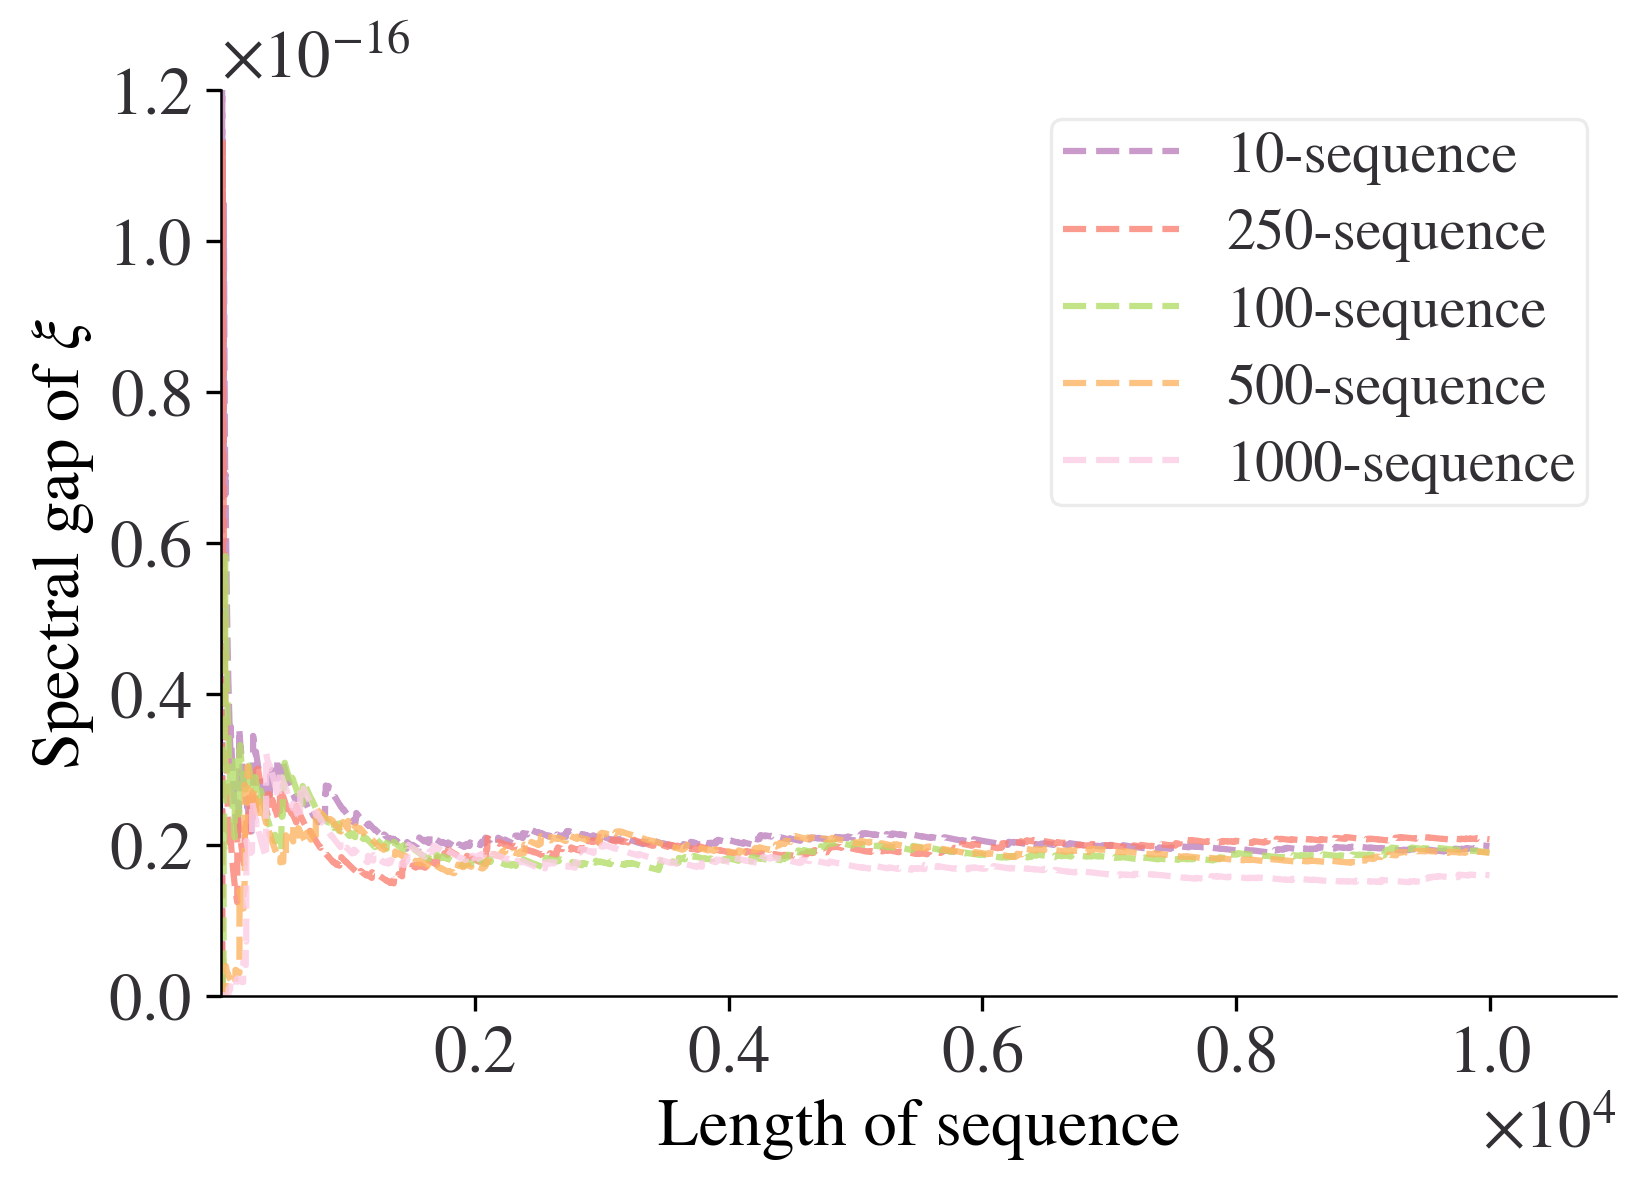

In [50]:
df_test = pd.DataFrame()
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xlabel('Length of sequence', fontsize = 16)
plt.ylabel(r'Spectral gap of $\xi$', fontsize= 16)
for i in [1,25,10,50,100]:
    x= np.asarray(determ_ksi.iloc[:,10*i].expanding().mean())
#     print(x.max())
    df_test[i] = x
    y = df_test.std(axis=1)
    plt.plot(x,linestyle='--', label =str(10*i)+'-sequence',linewidth=1.5, alpha=1.8)
    plt.xlim(0.1, 1.1*10000)
    plt.ylim(0, 1.2e-16)
    error=y.expanding(i).std()
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                     linewidth=0.4, linestyle='dashdot', antialiased=False)
    _=plt.legend(fontsize = 14)
    plt.savefig(os.path.join(figures_path,'DetXi_multiple_slices.png'),dpi=300, bbox_inches = "tight")    # save the figure to file
    


# plt.plot(y)

In [30]:
x.max()

3.21856828705778e-17

In [41]:
def plot_single_sequence_no_error(df, seq_no):
    plt.xlim(0.1, 1.1*10000)
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    
    plt.plot(x, y, 'k-',linewidth=0.9, alpha=0.8, linestyle='dashdot')
    
#     plt.legend([str(seq_no)+'-th sequence'])

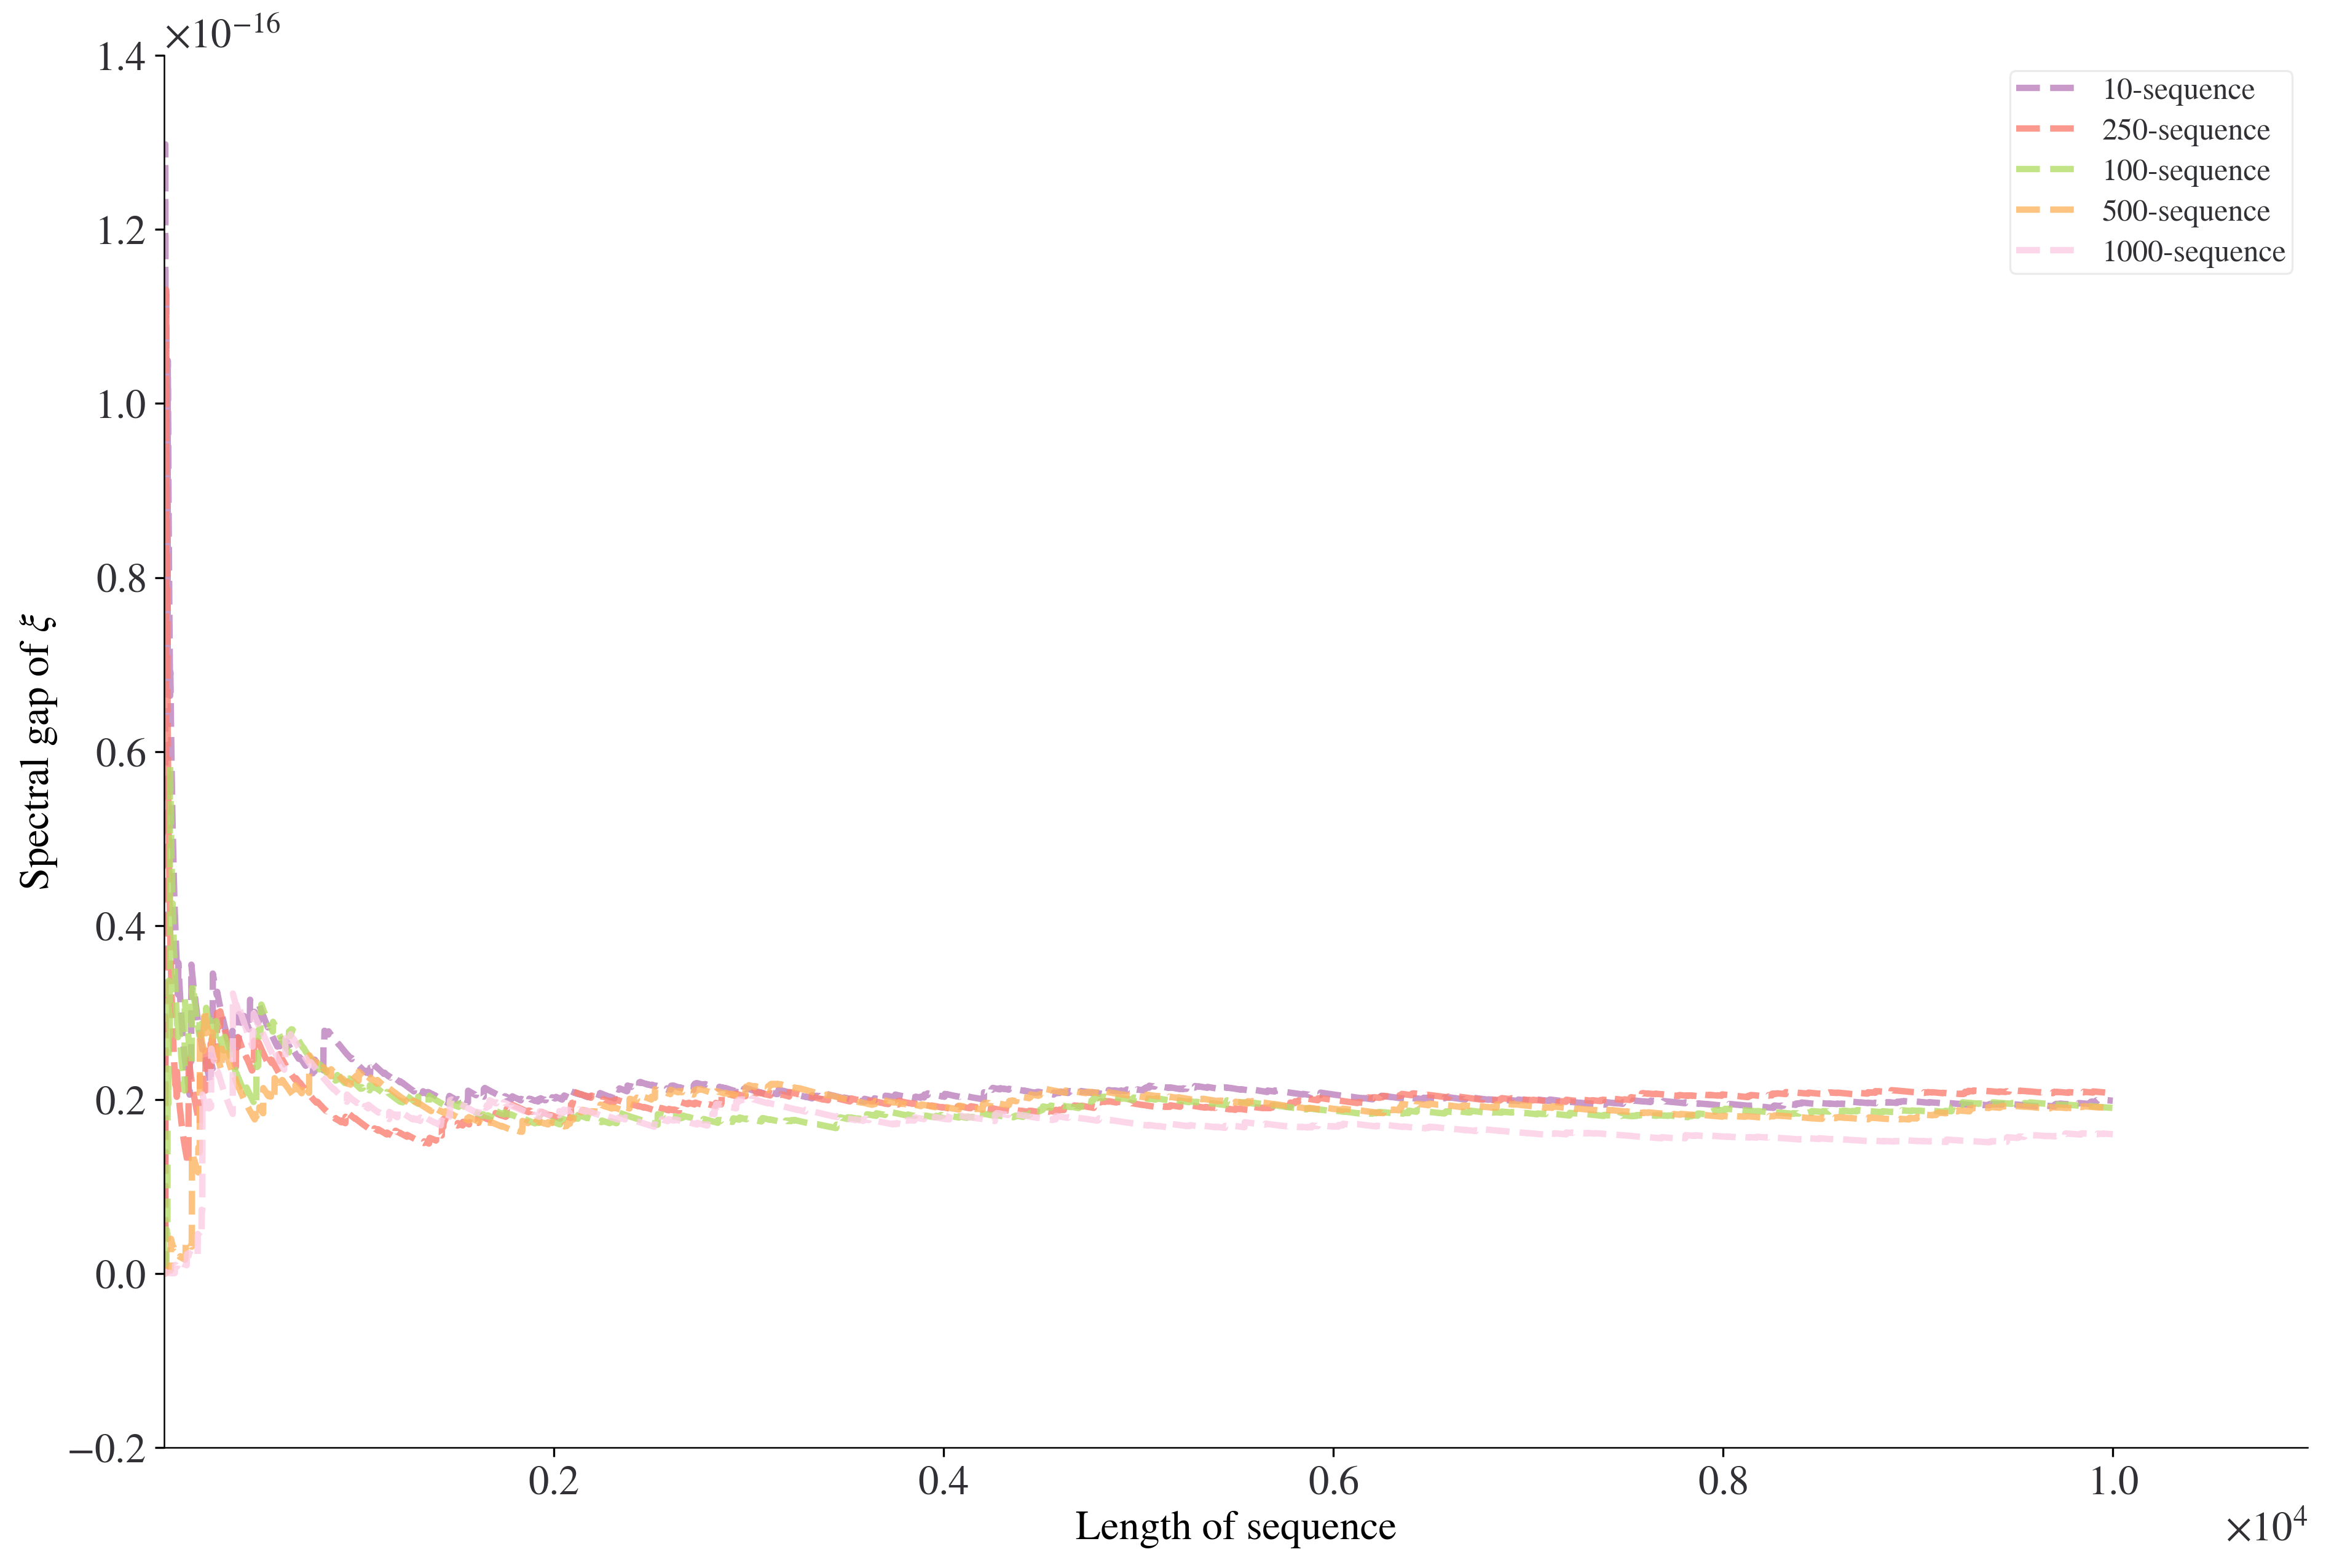

In [38]:

plt.figure(figsize=(15,10))
plt.rc('image', cmap='Blues')

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xlabel('Length of sequence', fontsize = 16)
plt.ylabel(r'Spectral gap of $\xi$', fontsize= 16)
_=plot_set(determ_ksi)

_=plt.legend(fontsize = 12)
plt.savefig(os.path.join(figures_path,'DetXi_multiple_slices.png') )  # save the figure to file

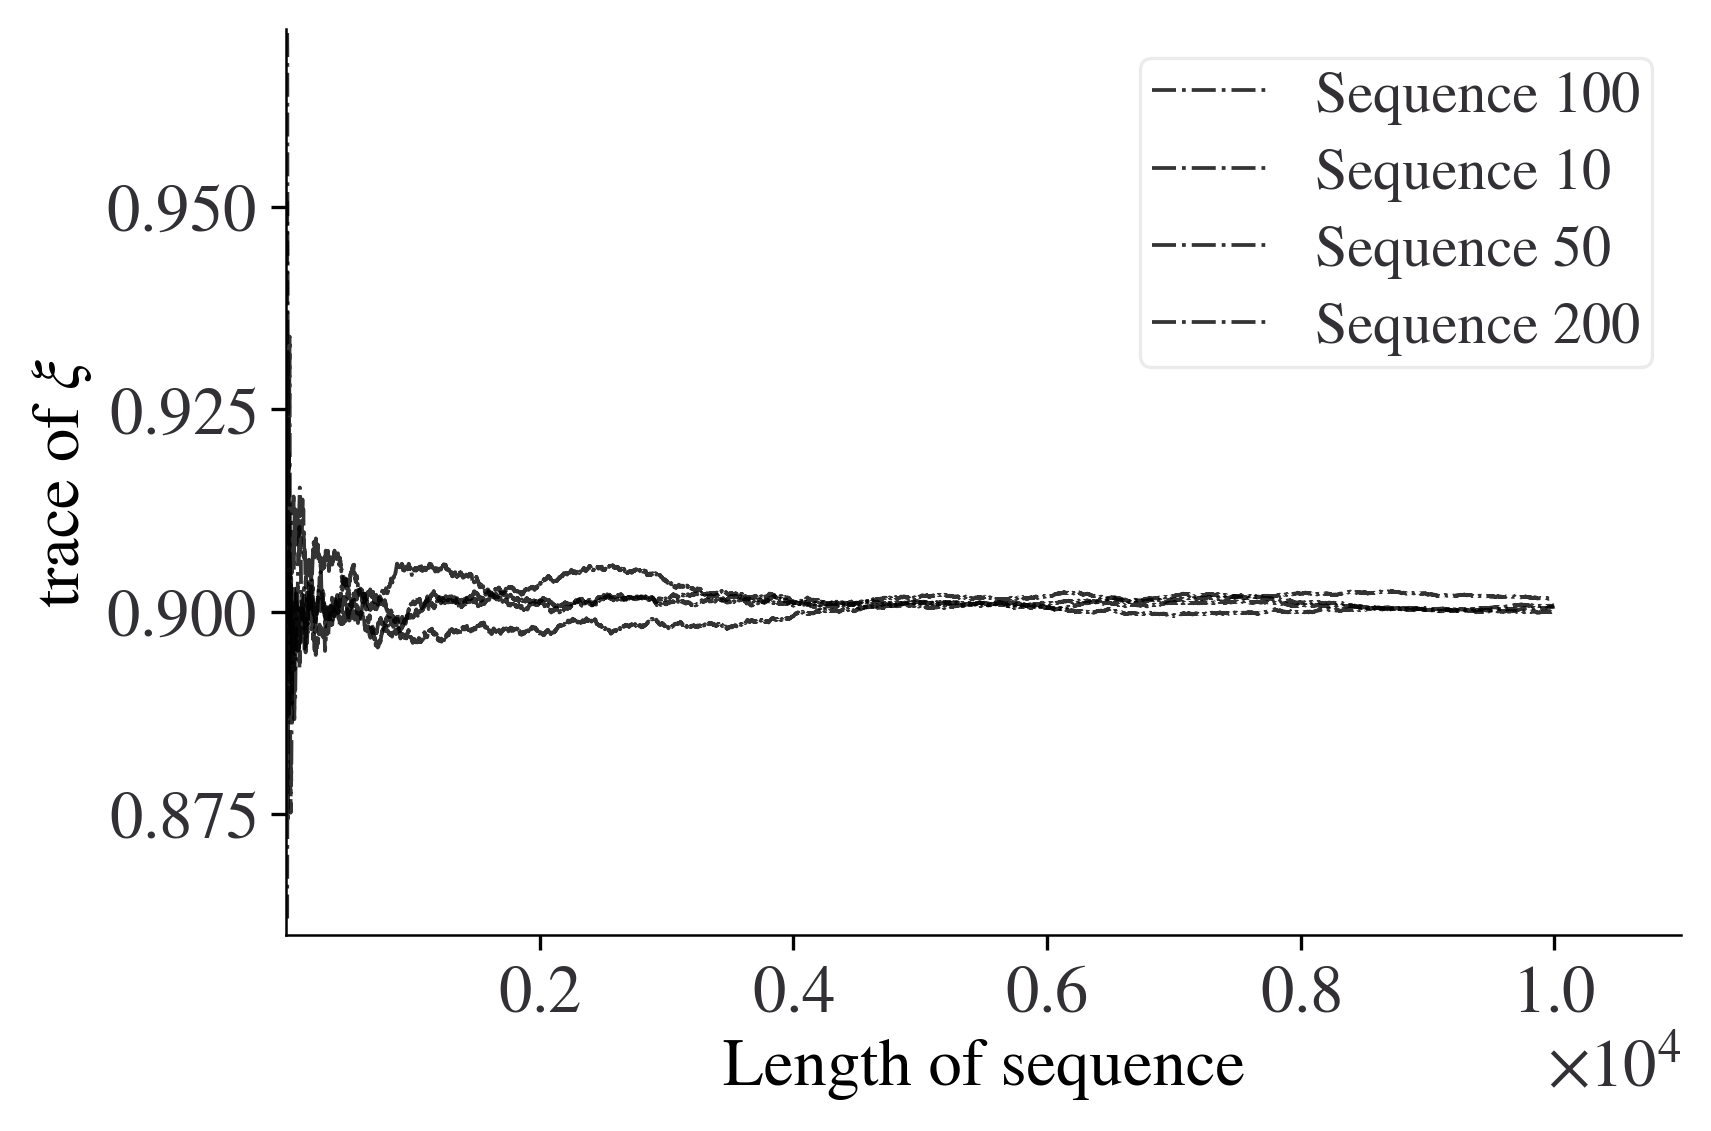

In [51]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xlabel('Length of sequence', fontsize = 16)
plt.ylabel(r'trace of $\xi$', fontsize= 16)
# plot_single_sequence(trace_ksi, 1000)
x1 =plot_single_sequence_no_error(trace_ksi, 100, )
x2 = plot_single_sequence_no_error(trace_ksi, 220)
x3 = plot_single_sequence_no_error(trace_ksi, 50, )
x4 = plot_single_sequence_no_error(trace_ksi, 200)
plt.ylim(0.86, 0.972)
plt.legend( ['Sequence'+' 100', 'Sequence'+' 10', 'Sequence'+' 50', 'Sequence'+' 200'], fontsize=14,loc='upper right')
plt.savefig(os.path.join(figures_path,'trace.png'),dpi=300, bbox_inches = "tight")   # save the figure to file

In [ ]:
x_df = pd.DataFrame()
for i in range(0,100):
    x_df[i]= np.asarray(determ_ksi.iloc[:,10*i].expanding().mean())
#     plt.plot(x,linestyle='--', label =str(10*i)+'-sequence',linewidth=2.5, alpha=0.8)
#     plt.xlim(0.1, 1.1*10000)

In [ ]:
plt.plot(x_df.median(axis=1))